<a href="https://colab.research.google.com/github/Ahmms/FYP/blob/main/Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 17.0 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=04f7a81f6db487ff1828cca33eedc042b4d952312f29c29e68217e7afbef25cb
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [4]:
path = "drive/MyDrive/FYP/Transformation/Dataset/"

In [15]:
# creating spark session
spark = SparkSession.builder.appName("Transformation").getOrCreate()
spark

In [16]:
df_spark = spark.read.csv(path + 'Sales_Forecast.csv', header = True, inferSchema = True)
df_spark.show(5)

+-------------------+-----+----+-----+
|               date|store|item|sales|
+-------------------+-----+----+-----+
|2013-01-01 00:00:00|    1|   1|   13|
|2013-01-02 00:00:00|    1|   1|   11|
|2013-01-03 00:00:00|    1|   1|   14|
|2013-01-04 00:00:00|    1|   1|   13|
|2013-01-05 00:00:00|    1|   1|   10|
+-------------------+-----+----+-----+
only showing top 5 rows



In [17]:
df_spark.printSchema()

root
 |-- date: timestamp (nullable = true)
 |-- store: integer (nullable = true)
 |-- item: integer (nullable = true)
 |-- sales: integer (nullable = true)



In [18]:
df_spark.columns

['date', 'store', 'item', 'sales']

In [19]:
df_spark.describe().show()

+-------+------------------+------------------+------------------+
|summary|             store|              item|             sales|
+-------+------------------+------------------+------------------+
|  count|            913000|            913000|            913000|
|   mean|               5.5|              25.5|52.250286966046005|
| stddev|2.8722828962611806|14.430877592663455|28.801143603516596|
|    min|                 1|                 1|                 0|
|    max|                10|                50|               231|
+-------+------------------+------------------+------------------+



In [21]:
# Using Cast to convert the TimestampType to DateType	
df2 = df_spark.withColumn('date', to_timestamp('date').cast('date'))
df2.show()

+----------+-----+----+-----+
|      date|store|item|sales|
+----------+-----+----+-----+
|2013-01-01|    1|   1|   13|
|2013-01-02|    1|   1|   11|
|2013-01-03|    1|   1|   14|
|2013-01-04|    1|   1|   13|
|2013-01-05|    1|   1|   10|
|2013-01-06|    1|   1|   12|
|2013-01-07|    1|   1|   10|
|2013-01-08|    1|   1|    9|
|2013-01-09|    1|   1|   12|
|2013-01-10|    1|   1|    9|
|2013-01-11|    1|   1|    9|
|2013-01-12|    1|   1|    7|
|2013-01-13|    1|   1|   10|
|2013-01-14|    1|   1|   12|
|2013-01-15|    1|   1|    5|
|2013-01-16|    1|   1|    7|
|2013-01-17|    1|   1|   16|
|2013-01-18|    1|   1|    7|
|2013-01-19|    1|   1|   18|
|2013-01-20|    1|   1|   15|
+----------+-----+----+-----+
only showing top 20 rows



In [22]:
# removing duplicate rows
df2.distinct().count()

913000

**Dealing with null values**

In [36]:
 # checking for null values
 # for this particular dataset, we don't have any null value in any col
df2.filter("date is Null or store is null or item is null or sales is null").show()

+----+-----+----+-----+
|date|store|item|sales|
+----+-----+----+-----+
+----+-----+----+-----+



In [38]:
# we will be dealing with null values in the following two ways
# 1) Dropping the record having null values in a col
# 2) Filling the null values with mean or median

In [30]:
# 1) Dropping the record with null values in a col
df3 = df2.na.drop()
df3.show()

+----------+-----+----+-----+
|      date|store|item|sales|
+----------+-----+----+-----+
|2013-01-01|    1|   1|   13|
|2013-01-02|    1|   1|   11|
|2013-01-03|    1|   1|   14|
|2013-01-04|    1|   1|   13|
|2013-01-05|    1|   1|   10|
|2013-01-06|    1|   1|   12|
|2013-01-07|    1|   1|   10|
|2013-01-08|    1|   1|    9|
|2013-01-09|    1|   1|   12|
|2013-01-10|    1|   1|    9|
|2013-01-11|    1|   1|    9|
|2013-01-12|    1|   1|    7|
|2013-01-13|    1|   1|   10|
|2013-01-14|    1|   1|   12|
|2013-01-15|    1|   1|    5|
|2013-01-16|    1|   1|    7|
|2013-01-17|    1|   1|   16|
|2013-01-18|    1|   1|    7|
|2013-01-19|    1|   1|   18|
|2013-01-20|    1|   1|   15|
+----------+-----+----+-----+
only showing top 20 rows



In [34]:
# 2) Filling the null values with mean or median
# We will use Imputer Function for this

from pyspark.ml.feature import Imputer
imputer = Imputer(
    inputCols = ['store', 'item', 'sales'],
    outputCols = ['{}_imputed'.format(c) for c in ['store', 'item', 'sales']]
).setStrategy('mean') # here we are filling the null values with mean of the values of that col having null value

In [35]:
# adding imputed cols to df_spark
imputer.fit(df2).transform(df2).show()

+----------+-----+----+-----+-------------+------------+-------------+
|      date|store|item|sales|store_imputed|item_imputed|sales_imputed|
+----------+-----+----+-----+-------------+------------+-------------+
|2013-01-01|    1|   1|   13|            1|           1|           13|
|2013-01-02|    1|   1|   11|            1|           1|           11|
|2013-01-03|    1|   1|   14|            1|           1|           14|
|2013-01-04|    1|   1|   13|            1|           1|           13|
|2013-01-05|    1|   1|   10|            1|           1|           10|
|2013-01-06|    1|   1|   12|            1|           1|           12|
|2013-01-07|    1|   1|   10|            1|           1|           10|
|2013-01-08|    1|   1|    9|            1|           1|            9|
|2013-01-09|    1|   1|   12|            1|           1|           12|
|2013-01-10|    1|   1|    9|            1|           1|            9|
|2013-01-11|    1|   1|    9|            1|           1|            9|
|2013-

In [39]:
# Ofcourse there will be many more methods for performing this task like filling the null values with immediate previous or next value,
# but for the time being, we are only considering above two methods

**Filtering records**

In [50]:
# checking the sales within a particular date range
df2.filter('year(date)>2013 and year(date)<=2015').select([year('date'), 'sales']).sort('sales').show()


+----------+-----+
|year(date)|sales|
+----------+-----+
|      2014|    0|
|      2014|    1|
|      2015|    1|
|      2015|    2|
|      2014|    2|
|      2015|    2|
|      2014|    2|
|      2014|    2|
|      2014|    2|
|      2014|    2|
|      2014|    2|
|      2015|    2|
|      2014|    3|
|      2015|    3|
|      2014|    3|
|      2014|    3|
|      2014|    3|
|      2014|    3|
|      2015|    3|
|      2014|    3|
+----------+-----+
only showing top 20 rows



**GroupBy Aggregate functions**

In [58]:
# total sales for each item till date
df2.groupBy('item').sum('sales').sort('item').show()

+----+----------+
|item|sum(sales)|
+----+----------+
|   1|    401384|
|   2|   1069564|
|   3|    669087|
|   4|    401907|
|   5|    335230|
|   6|   1068281|
|   7|   1068777|
|   8|   1405108|
|   9|    938379|
|  10|   1337133|
|  11|   1271925|
|  12|   1271534|
|  13|   1539621|
|  14|   1071531|
|  15|   1607442|
|  16|    468480|
|  17|    602486|
|  18|   1538876|
|  19|    736892|
|  20|    867641|
+----+----------+
only showing top 20 rows



In [57]:
# most sold item till date (descending order)
df2.groupBy('item').agg(sum('sales').alias('sales_sum')).orderBy(desc('sales_sum')).show()

+----+---------+
|item|sales_sum|
+----+---------+
|  15|  1607442|
|  28|  1604713|
|  13|  1539621|
|  18|  1538876|
|  25|  1473334|
|  45|  1471467|
|  38|  1470330|
|  22|  1469971|
|  36|  1406548|
|   8|  1405108|
|  10|  1337133|
|  11|  1271925|
|  12|  1271534|
|  29|  1271240|
|  33|  1270183|
|  24|  1205975|
|  50|  1203009|
|  35|  1201541|
|  14|  1071531|
|  31|  1070845|
+----+---------+
only showing top 20 rows



In [70]:
# Average sales for each item
df2.groupBy('item').agg(round(avg('sales'), 2).alias("Rounded Salary")).sort('item').show()

+----+--------------+
|item|Rounded Salary|
+----+--------------+
|   1|         21.98|
|   2|         58.57|
|   3|         36.64|
|   4|         22.01|
|   5|         18.36|
|   6|          58.5|
|   7|         58.53|
|   8|         76.95|
|   9|         51.39|
|  10|         73.23|
|  11|         69.66|
|  12|         69.63|
|  13|         84.32|
|  14|         58.68|
|  15|         88.03|
|  16|         25.66|
|  17|         32.99|
|  18|         84.28|
|  19|         40.36|
|  20|         47.52|
+----+--------------+
only showing top 20 rows



In [86]:
# checking the sales trend with respect to years
# df2.sql("SELECT year(date) as year, sum(sales) as sales FROM Sales_Forecast GROUP BY year(date) ORDER BY year;")
df3 = df2.groupBy(year('date').alias('year')).agg(sum('sales').alias('sales')).orderBy(year('date')).show()

+----+--------+
|year|   sales|
+----+--------+
|2013| 7941243|
|2014| 9135482|
|2015| 9536887|
|2016|10357160|
|2017|10733740|
+----+--------+



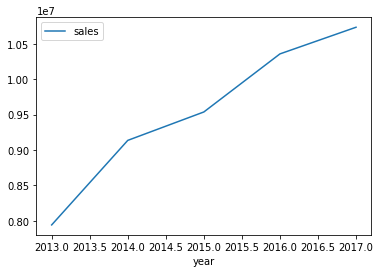

In [87]:
df3 = df2.groupBy(year('date').alias('year')).agg(sum('sales').alias('sales')).orderBy(year('date')).toPandas()
df3.plot.line(x='year', y='sales')  # we can see the increasing trend

**Converting all features into a single feature vector**

In [88]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [94]:
assembler = VectorAssembler(
    inputCols = ['store', 'item'],
    outputCol = 'features'
)

output = assembler.transform(df2)
output.show()

+----------+-----+----+-----+---------+
|      date|store|item|sales| features|
+----------+-----+----+-----+---------+
|2013-01-01|    1|   1|   13|[1.0,1.0]|
|2013-01-02|    1|   1|   11|[1.0,1.0]|
|2013-01-03|    1|   1|   14|[1.0,1.0]|
|2013-01-04|    1|   1|   13|[1.0,1.0]|
|2013-01-05|    1|   1|   10|[1.0,1.0]|
|2013-01-06|    1|   1|   12|[1.0,1.0]|
|2013-01-07|    1|   1|   10|[1.0,1.0]|
|2013-01-08|    1|   1|    9|[1.0,1.0]|
|2013-01-09|    1|   1|   12|[1.0,1.0]|
|2013-01-10|    1|   1|    9|[1.0,1.0]|
|2013-01-11|    1|   1|    9|[1.0,1.0]|
|2013-01-12|    1|   1|    7|[1.0,1.0]|
|2013-01-13|    1|   1|   10|[1.0,1.0]|
|2013-01-14|    1|   1|   12|[1.0,1.0]|
|2013-01-15|    1|   1|    5|[1.0,1.0]|
|2013-01-16|    1|   1|    7|[1.0,1.0]|
|2013-01-17|    1|   1|   16|[1.0,1.0]|
|2013-01-18|    1|   1|    7|[1.0,1.0]|
|2013-01-19|    1|   1|   18|[1.0,1.0]|
|2013-01-20|    1|   1|   15|[1.0,1.0]|
+----------+-----+----+-----+---------+
only showing top 20 rows



In [95]:
# final dataset that will be used in ml model
df_final = output.select('features', 'sales')
df_final.show()

+---------+-----+
| features|sales|
+---------+-----+
|[1.0,1.0]|   13|
|[1.0,1.0]|   11|
|[1.0,1.0]|   14|
|[1.0,1.0]|   13|
|[1.0,1.0]|   10|
|[1.0,1.0]|   12|
|[1.0,1.0]|   10|
|[1.0,1.0]|    9|
|[1.0,1.0]|   12|
|[1.0,1.0]|    9|
|[1.0,1.0]|    9|
|[1.0,1.0]|    7|
|[1.0,1.0]|   10|
|[1.0,1.0]|   12|
|[1.0,1.0]|    5|
|[1.0,1.0]|    7|
|[1.0,1.0]|   16|
|[1.0,1.0]|    7|
|[1.0,1.0]|   18|
|[1.0,1.0]|   15|
+---------+-----+
only showing top 20 rows

